# Spritz validation

Here we look at the files to be released, produced by lisanode, and check that everything looks good.  

- mbhb1-training.h5:  MBHB dataset 1 is MBHB#0 from sangria data (a loud event), with 3 short glitches on top of it
- mbhb2-training.h5: MBHB dataset 2 is MBHB#6 from sangria data, with a ~5h glitch on top of it
- vgb-training.h5: VGB dataset is the 17 verification binaries of sangria data (fdot corrected), with an LPF like distribution of glitches on top of them 

The 2 MBHB dataset have a duration of 1 month. The VGB dataset is 1 year long.

The 'training' files contains:
- TDI with noise and artifacts, 
- TDI without artifacts 
- TDI without noise and artifacts,

as well as source parameters and all the configuration parameters used to produce the data. 

A fourth data set made of TDI without noise is also given and used to cross check that gw signal, artifact and noise are linearly combined by the simulator.  


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ldc.io.hdf5 as h5io
from ldc.common.series import TDI, TimeSeries
from ldc.lisa.noise import get_noise_model
from ldc.waveform.waveform import HpHc
from ldc.lisa.orbits import Orbits
from ldc.lisa.projection import ProjectedStrain
import scipy.signal
from ldc.common.tools import window

import sys
sys.path.append("../../sangria") # where to find pipeviewer.py
from pipeviewer import PipeViewer

release_dir = "/lisa/spritz/v4"
pv = PipeViewer.spritz(release_dir)

## Pipeline configuration

In [2]:
cfg_pipe = pv.get_pipe_config()

## MBHB1 data set

In [3]:
cfg = pv.get_config('mbhb1')

### Loading noisy and noise free data

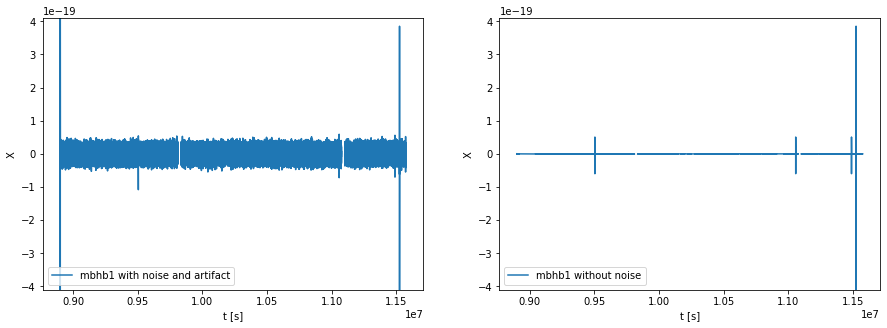

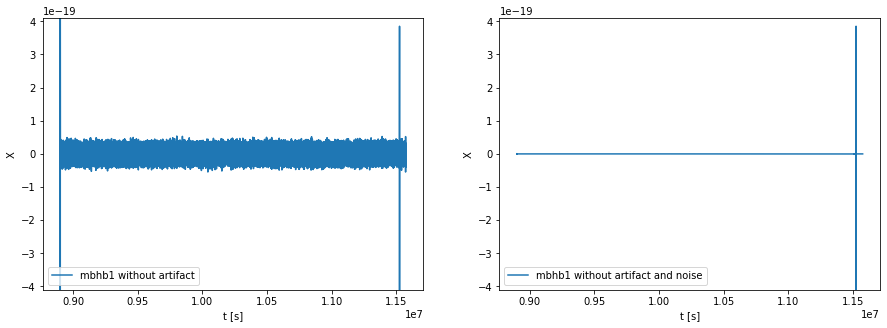

In [4]:
plt.figure(figsize=(15,5))
ds = pv.plot_all_dataset("mbhb1")

### Linearity

<Figure size 1080x360 with 0 Axes>

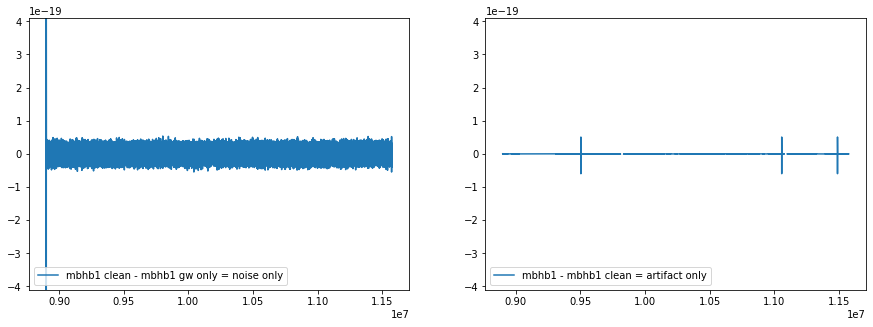

In [5]:
plt.figure(figsize=(15,5));ds = pv.plot_combined_dataset("mbhb1")

### Building GW only TDI signal using LDC

In [6]:
mbhb1_gw2 = pv.compute_gwonly('mbhb1')

### Looking at artifacts

In the following we check that:

- the gw only simulation performed by lisanode is compatible with a noise free TDI computation by LDC
- the linearity of the combination, by comparing the noise free simulation performed by lisanode with a combination of the 3 others (gw only + artifact only)

In [3]:
def do_plot(source, ds, ldc_gw):
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(121)
    ax1.set_title(f"{source} without noise")
    ax1.plot(ds["full"].t, ds["gwonly"]["X"], label="gw only")
    ax1.plot(ds["full"].t, ds["noisefree"]["X"], label="gw + artifacts", alpha=0.7)
    ax1.legend()
    ax2 = plt.subplot(122)
    ax2.set_title("Difference")
    ax2.plot(ds["full"].t, ds["gwonly"]["X"]-ldc_gw, label="gw residual: lisanode - ldc")
    ax2.plot(ds["full"].t, ds["noisefree"]["X"]-ds["noisefree2"]['X'], label="noise free residual: linearity", alpha=0.7)
    plt.legend()
    return ax1, ax2

Text(0.5, 1.0, 'Difference at merger')

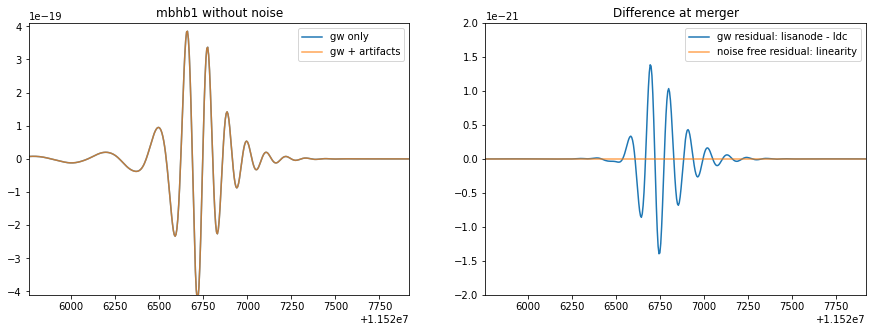

In [8]:
ax1, ax2 = do_plot("mbhb1", ds, mbhb1_gw2)
ax1.axis([133.4*60*60*24, 133.425*24*60*60, -4.1e-19, 4.1e-19])
ax2.axis([133.4*60*60*24, 133.425*24*60*60, -2e-21, 2e-21])
ax2.set_title("Difference at merger")

In [9]:
cfg

{'approximant': 'IMRPhenomD',
 'catalogs': '/data/Q3d_complete',
 'dt': <Quantity 2.5 s>,
 'gaps_seed': 1245,
 'glitch_deltat_0': 10,
 'glitch_deltat_1': 11,
 'glitch_inj_point_0': 'tm_12',
 'glitch_inj_point_1': 'tm_12',
 'glitch_inj_point_2': 'tm_12',
 'glitch_level_0': 2.202238810758277e-11,
 'glitch_level_1': 2.202238810758277e-11,
 'glitch_level_2': 2.202238810758277e-11,
 'glitch_t_inj_0': <Quantity 110. d>,
 'glitch_t_inj_1': <Quantity 128. d>,
 'glitch_t_inj_2': <Quantity 133. d>,
 'glitch_type': 'short',
 'indices_0': 185,
 'nsource': 1,
 'source_type': 'MBHB',
 't_max': <Quantity 134. d>,
 't_min': <Quantity 103. d>}

11491200.0


Text(0.5, 1.0, 'Difference at 3rd glitch position')

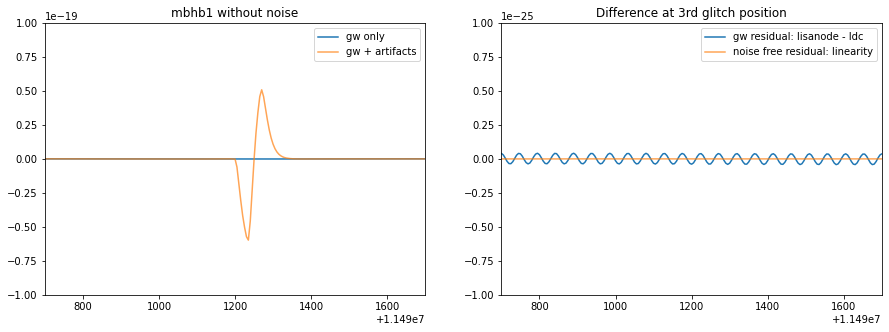

In [10]:
tinj = cfg["glitch_t_inj_2"].to("s").value
print(tinj)
ax1, ax2 = do_plot("mbhb1", ds, mbhb1_gw2)
ax1.axis([tinj-500, tinj+500, -1e-19, 1e-19])
ax2.axis([tinj-500, tinj+500, -1e-25, 1e-25])
ax2.set_title("Difference at 3rd glitch position")

Text(0.5, 1.0, 'Difference at gap position')

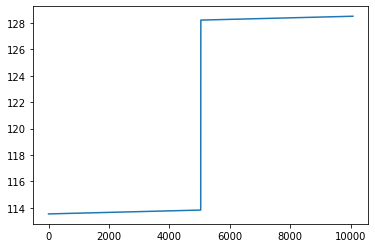

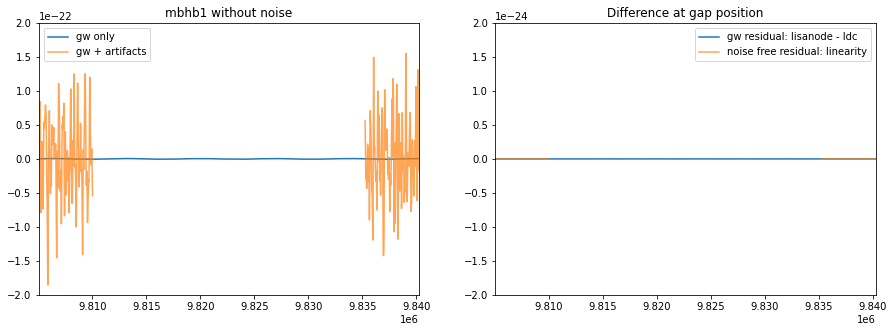

In [11]:
gaps = ds["noisefree"].t[np.where(np.isnan(ds["noisefree"]["X"]))[0]]
plt.figure()
plt.plot(gaps/(60*60*24))
g0 = gaps[0]
g_duration = cfg_pipe["gaps_duration"].to("s").value
g_length = int(g_duration/cfg_pipe["dt_tdi"].to("s").value)+1
g1 = gaps[g_length]

ax1, ax2 = do_plot("mbhb1", ds, mbhb1_gw2)
ax1.axis([g0-5000, g0+g_duration+5000, -2e-22, 2e-22])
ax2.axis([g0-5000, g0+g_duration+5000, -2e-24, 2e-24])
ax2.set_title("Difference at gap position")

### Looking at noise

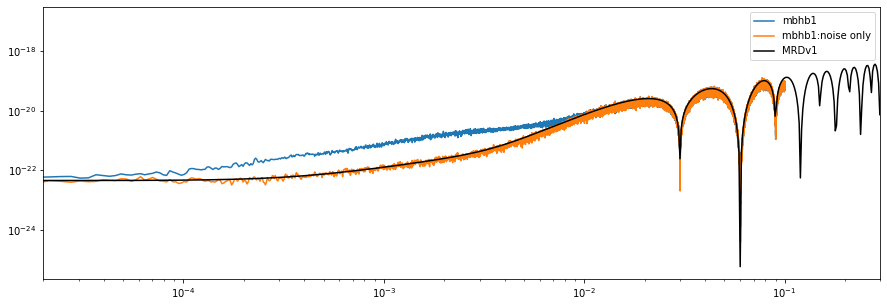

In [12]:
plt.figure(figsize=(15,5));pv.plot_noise_psd('mbhb1')

## MBHB2 data set 

In [13]:
cfg = pv.get_config('mbhb2')

### Loading noisy and noise free data

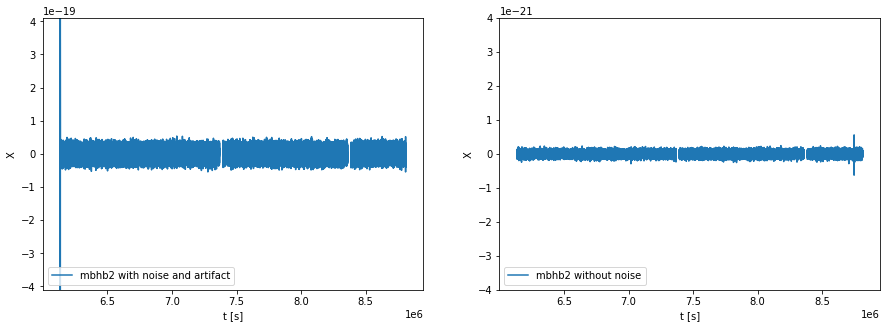

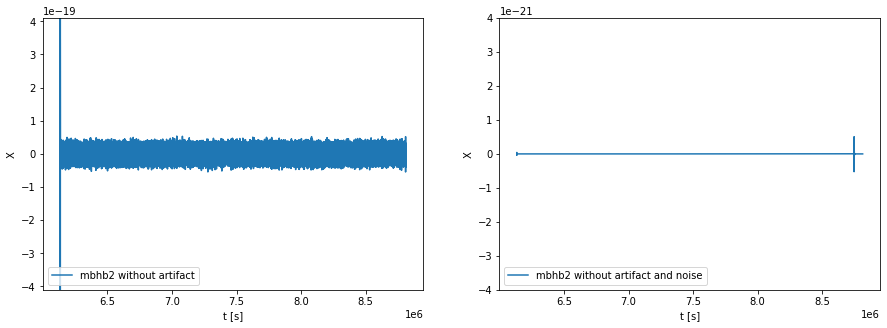

In [14]:
plt.figure(figsize=(15,5));ds = pv.plot_all_dataset("mbhb2")

<Figure size 1080x360 with 0 Axes>

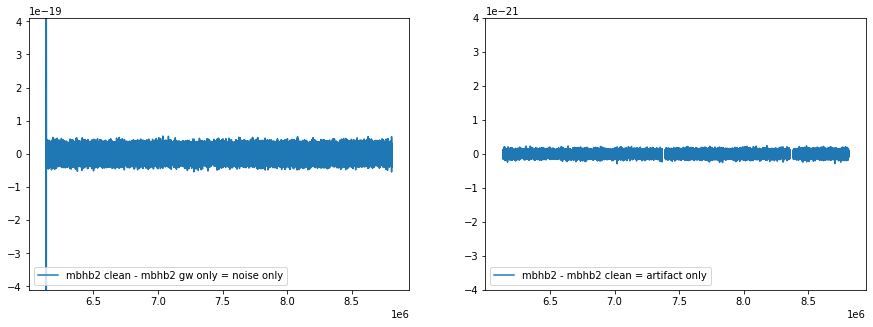

In [15]:
plt.figure(figsize=(15,5));ds = pv.plot_combined_dataset("mbhb2")

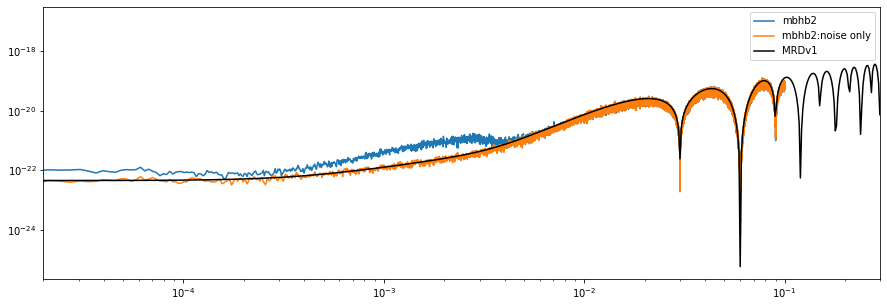

In [16]:
plt.figure(figsize=(15,5));pv.plot_noise_psd('mbhb2')

### Building GW only TDI signal

In [17]:
mbhb2_gw2 = pv.compute_gwonly('mbhb2')

### Looking at artifacts

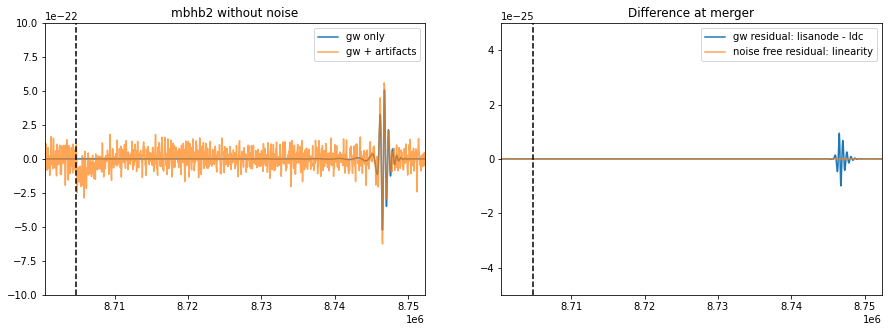

In [18]:
ax1, ax2 = do_plot("mbhb2", ds, mbhb2_gw2)
ax1.axis([100.7*60*60*24, 101.3*24*60*60, -1e-21, 1e-21])
ax2.axis([100.7*60*60*24, 101.3*24*60*60, -0.5e-24, 0.5e-24])
ax2.set_title("Difference at merger")
tinj = cfg["glitch_t_inj"].to("s").value
ax1.axvline(x=tinj, color='k', ls='--')
ax2.axvline(x=tinj, color='k', ls='--')

The glitch has an amplitude of ~ 0.5e-22 and is below the galactic noise. 

Text(0.5, 1.0, 'Difference at gap position')

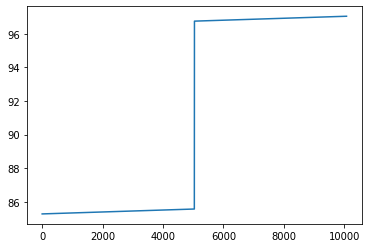

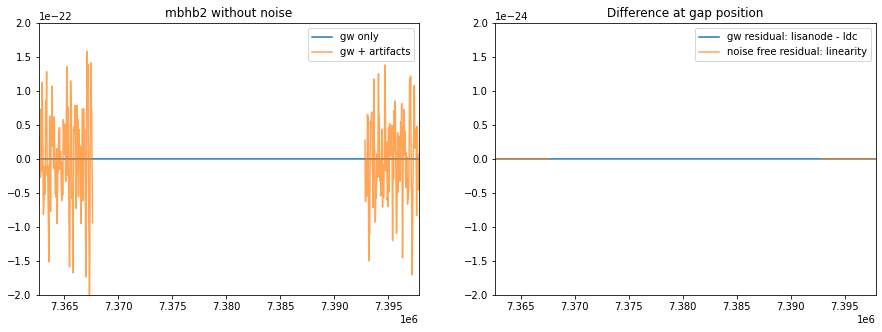

In [19]:
gaps = ds["noisefree"].t[np.where(np.isnan(ds["noisefree"]["X"]))[0]]
plt.figure()
plt.plot(gaps/(60*60*24))
g0 = gaps[0]
g_duration = cfg_pipe["gaps_duration"].to("s").value
g_length = int(g_duration/cfg_pipe["dt_tdi"].to("s").value)+1
g1 = gaps[g_length]

ax1, ax2 = do_plot("mbhb2", ds, mbhb2_gw2)
ax1.axis([g0-5000, g0+g_duration+5000, -2e-22, 2e-22])
ax2.axis([g0-5000, g0+g_duration+5000, -2e-24, 2e-24])
ax2.set_title("Difference at gap position")

## VGB data set 

In [6]:
cfg = pv.get_config('vgb')

### Loading noisy and noise free data

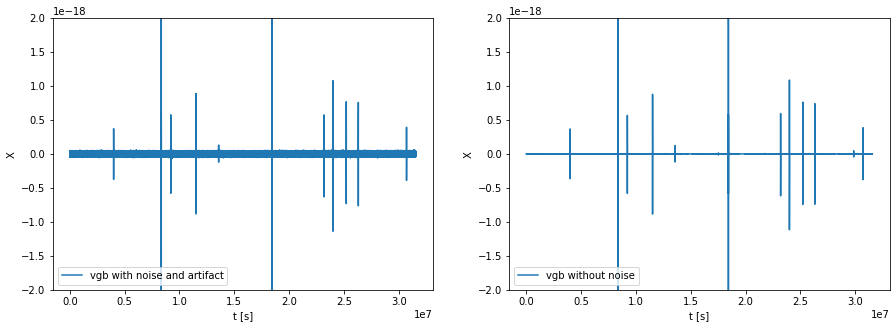

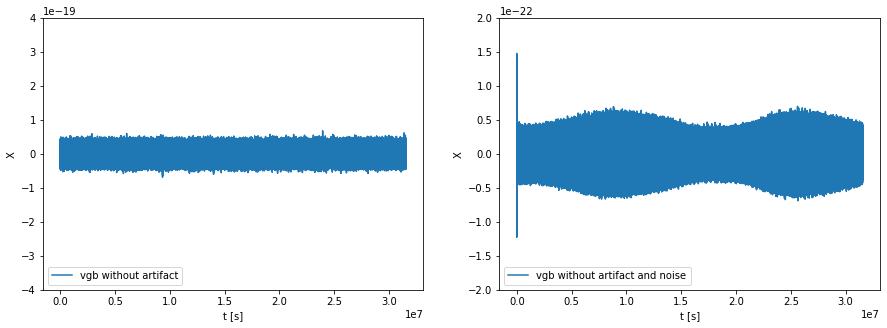

In [4]:
plt.figure(figsize=(15,5));ds = pv.plot_all_dataset("vgb")

<Figure size 1080x360 with 0 Axes>

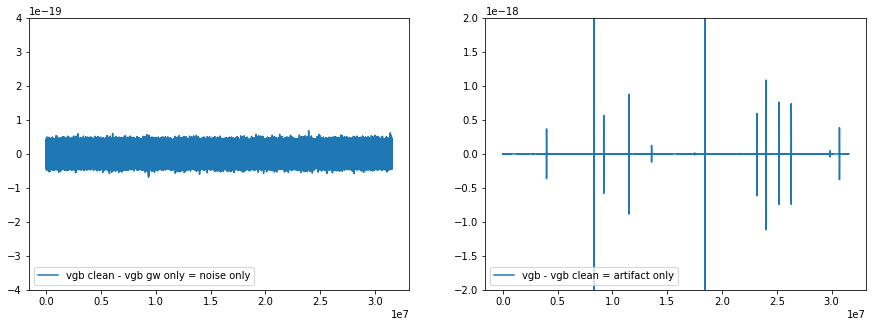

In [5]:
plt.figure(figsize=(15,5));ds = pv.plot_combined_dataset("vgb")

### Building GW only TDI signal

In [7]:
vgb_gw2 = pv.compute_gwonly('vgb')

### Looking at artifacts

Text(0.5, 1.0, 'Difference at day 10')

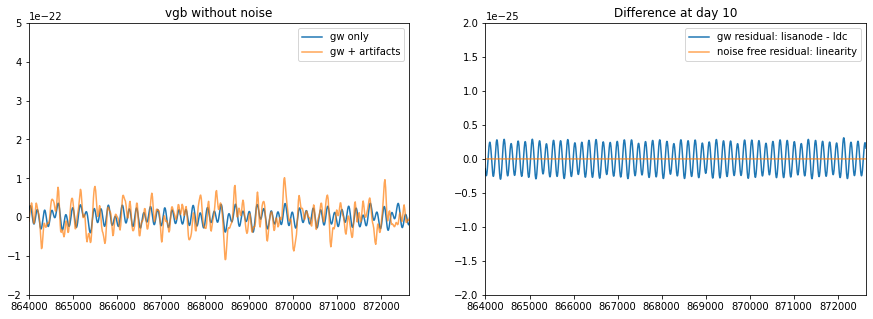

In [8]:
ax1, ax2 = do_plot("vgb", ds, vgb_gw2)
ax1.axis([10*60*60*24, 10.1*24*60*60, -2e-22, 0.5e-21])
ax2.axis([10*60*60*24, 10.1*24*60*60, -2e-25, 2e-25])
ax2.set_title("Difference at day 10")

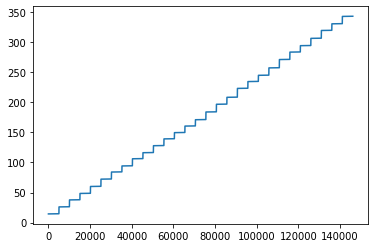

In [25]:
gaps = ds["noisefree"].t[np.where(np.isnan(ds["noisefree"]["X"]))[0]]
plt.figure()
plt.plot(gaps/(60*60*24))

### Looking at noise

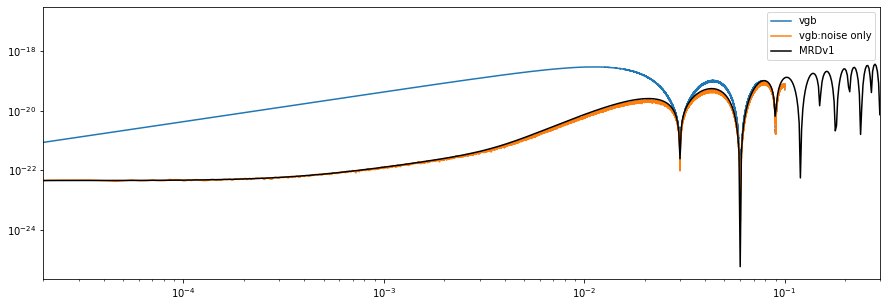

In [9]:
plt.figure(figsize=(15,5));pv.plot_noise_psd('vgb')

## Glitches

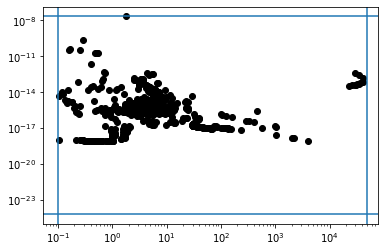

In [32]:
import h5py
N = dict({"12":249, "13":289, "31":251, "21":243, "23":282, "32":251})
fid = h5py.File("/lisa/spritz/v4/vgb-glitch.h5")
plt.figure()
B = []
A = []
for k, v in N.items():
    B.append(np.array([fid[f'tm_{k}'].attrs[f"inj{i}_beta"] for i in range(v)]))
    A.append(np.array([fid[f'tm_{k}'].attrs[f"inj{i}_level"] for i in range(v)]))
    
plt.plot(np.hstack(B), np.hstack(A), 'ko')
plt.yscale("log")
plt.xscale("log")
plt.axvline(x=0.1)
plt.axvline(x=50000)
plt.axhline(y=6.181983653617034e-25)
plt.axhline(y=2.1487741314798323e-08)

    


## Laser noise

A special production without laser

In [28]:
release_dir = "/lisa/spritz/v3"
pv_woln = PipeViewer.spritz(release_dir)

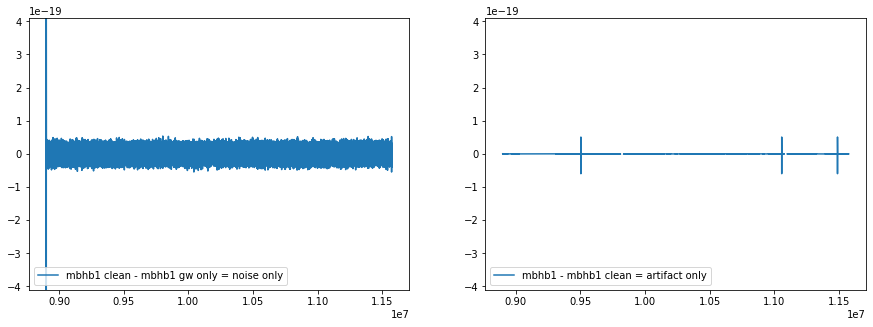

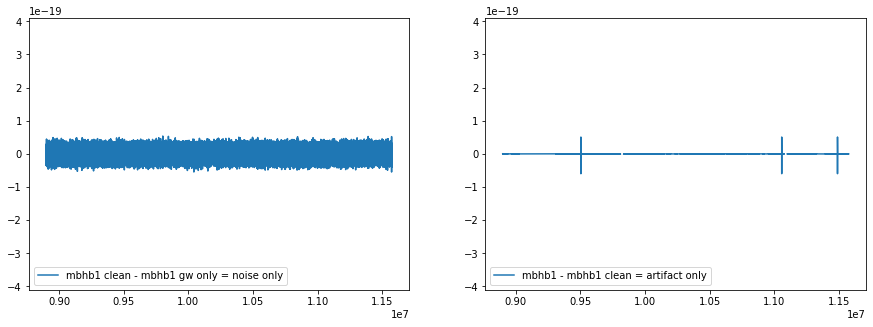

In [29]:
ds1 = pv.plot_combined_dataset("mbhb1")
ds2 = pv_woln.plot_combined_dataset("mbhb1")

In [42]:
mbhb1_gw = pv.compute_gwonly('mbhb1')

(8765280.25, 11711514.75, -2e-25, 2e-25)

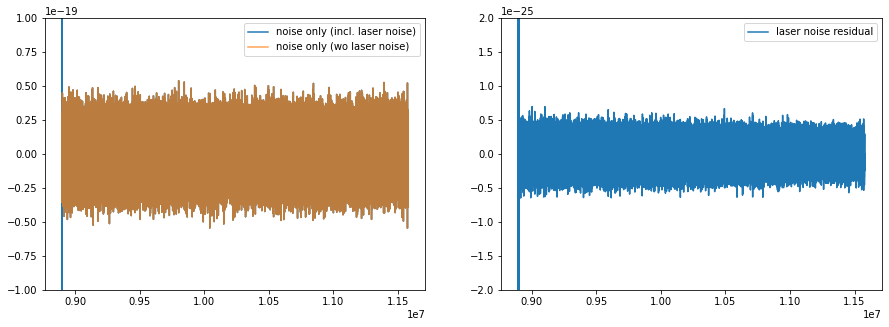

In [44]:
plt.figure(figsize=(15,5))
ax1 = plt.subplot(121)
ax1.plot(ds1["noiseonly"].t, ds1["noiseonly"]["X"], label="noise only (incl. laser noise)")
ax1.plot(ds2["noiseonly"].t, ds2["noiseonly"]["X"], label="noise only (wo laser noise)", alpha=0.7)
ax1.legend()
plt.axis([None, None, -1e-19, 1e-19])
ax1 = plt.subplot(122)
ax1.plot(ds1["noiseonly"].t, ds1["noiseonly"]["X"]-ds2["noiseonly"]["X"], label="laser noise residual")
#ax1.plot(mbhb1_gw.t, mbhb1_gw, label="gw only")
ax1.legend()
plt.axis([None, None, -2e-25, 2e-25])

dict_keys(['full', 'noisefree', 'clean', 'gwonly', 'noiseonly', 'artifactonly', 'noisefree2'])